In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_files = 1520

In [24]:
all_walls_array = np.load('all_walls_array.npy')
all_walls_div_array = np.load('all_walls_div_array.npy')
print(all_walls_array.shape)
print('start, end, height, total cost, wall cost')
print(all_walls_div_array.shape)

(1520, 5)
start, end, height, total cost, wall cost
(1520, 100, 18)


In [61]:
#unconstrained minimum

min_cost = 1e10
min_index = 0
for i in range(num_files):
    total_cost = all_walls_array[i,3]
    if total_cost < min_cost:
        min_cost = total_cost
        min_index = i
print(min_cost)
print(min_index)

2447282822.328389
164


In [62]:
print(all_walls_array[164,:])

[0.00000000e+00 1.63000000e+02 2.50000000e+00 2.44728282e+09
 1.99308600e+09]


In [69]:
# Constraint parameters
threshold = 2e8
percentage = 95


satisfy = []
for i in range(num_files):
    if np.sum(np.sum(all_walls_div_array[i,:,:] < threshold, axis = 0) > percentage) == 18:
        satisfy.append(i)
              
    #print(div_array.shape)
    #total_cost = wall[3]

    #if total_cost < min_cost:
    #    min_cost = total_cost
    #    min_index = i
    #print(total_cost)
print(satisfy)

for i in satisfy:
    print(all_walls_array[i,:])

[166, 167, 168, 169]
[0.00000000e+00 1.63000000e+02 3.50000000e+00 3.01511551e+09
 2.79032040e+09]
[0.00000000e+00 1.63000000e+02 4.00000000e+00 3.37880044e+09
 3.18893760e+09]
[0.00000000e+00 1.63000000e+02 4.50000000e+00 3.77083628e+09
 3.58755480e+09]
[0.00000000e+00 1.63000000e+02 5.00000000e+00 4.16148231e+09
 3.98617200e+09]


Text(0, 0.5, 'frequency')

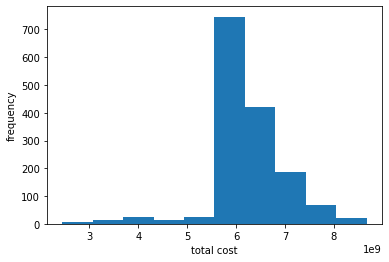

In [46]:
plt.hist(all_walls_array[:,3])
plt.xlabel('total cost')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

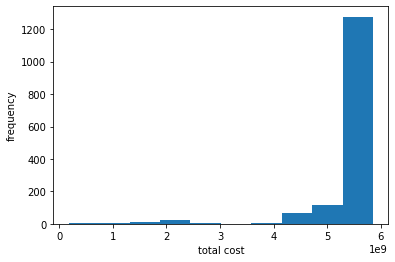

In [47]:
plt.hist(all_walls_array[:,3]-all_walls_array[:,4])
plt.xlabel('total cost')
plt.ylabel('frequency')

[0.00000000e+00 1.63000000e+02 2.50000000e+00 2.44728282e+09
 1.99308600e+09]


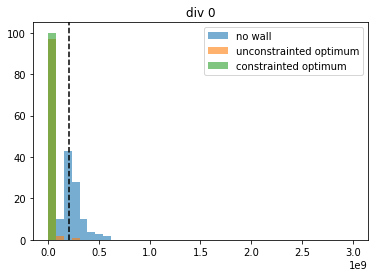

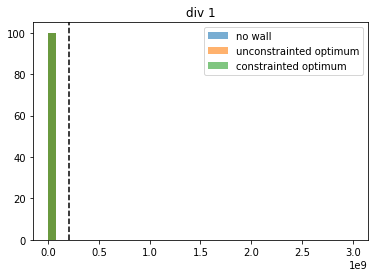

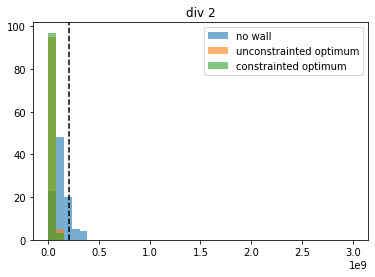

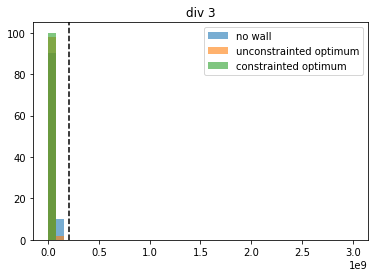

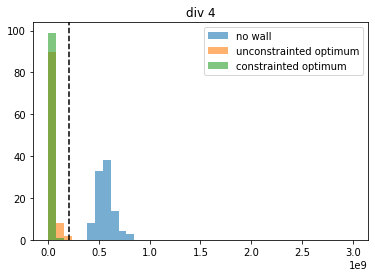

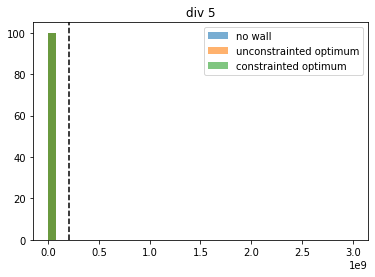

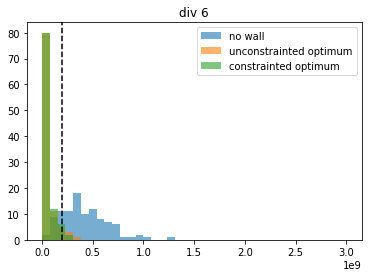

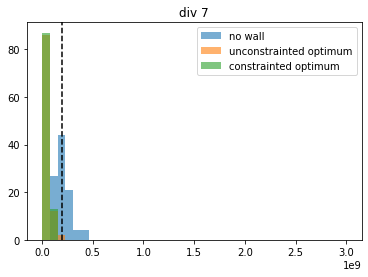

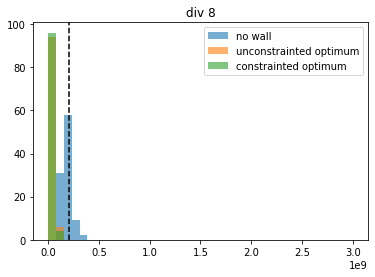

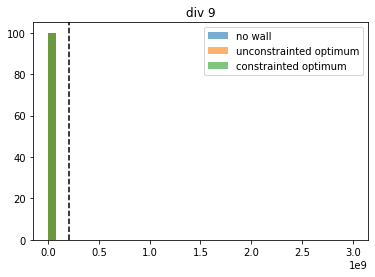

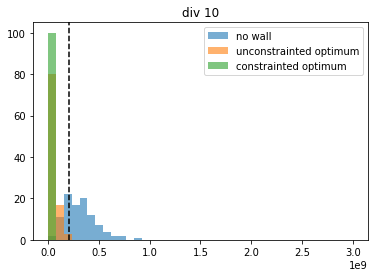

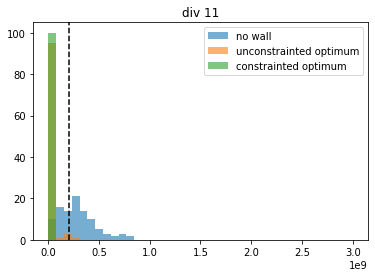

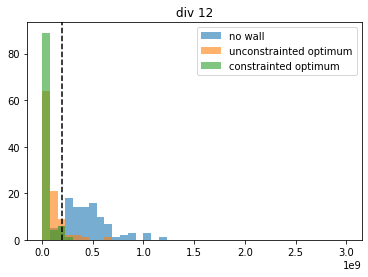

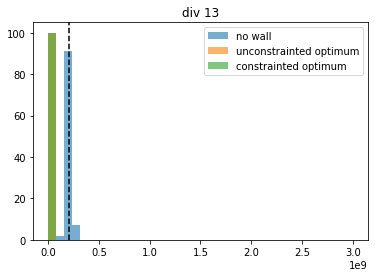

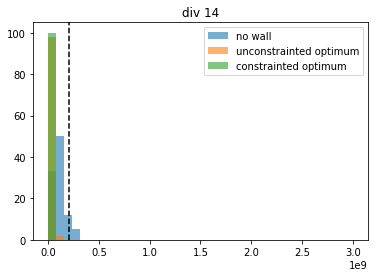

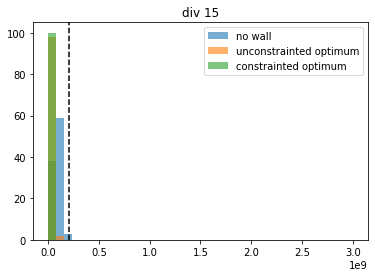

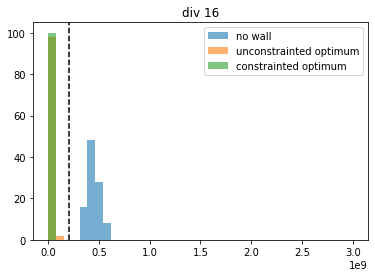

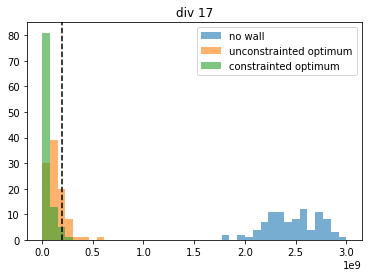

In [80]:
bins = np.linspace(0,3e9,40)
wallid = 164
print(all_walls_array[wallid])

for i in range(18):
    plt.hist(all_walls_div_array[0,:,i], bins = bins,alpha = 0.6, label = 'no wall')
    plt.hist(all_walls_div_array[wallid,:,i], bins = bins, alpha = 0.6, label = 'unconstrainted optimum')
    plt.hist(all_walls_div_array[166,:,i], bins = bins,alpha = 0.6, label = 'constrainted optimum')
    plt.axvline(threshold, c = 'k', ls = '--')
    plt.title('div ' + str(i))
    plt.legend()
    plt.show()

[0.00000000e+00 1.63000000e+02 2.50000000e+00 2.44728282e+09
 1.99308600e+09]


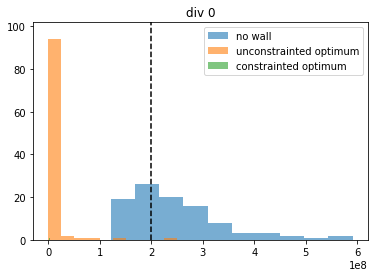

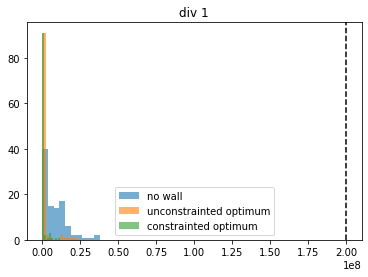

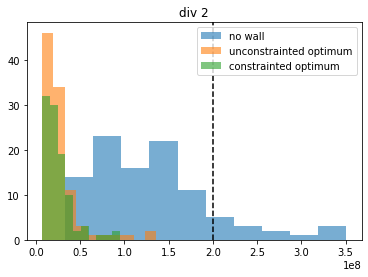

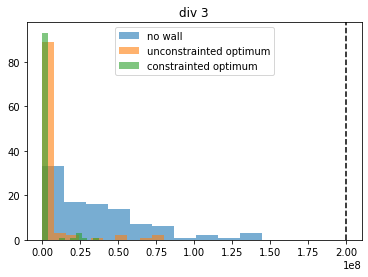

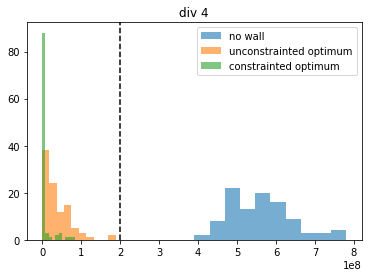

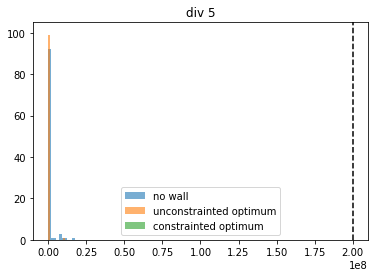

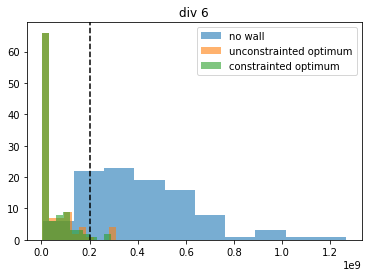

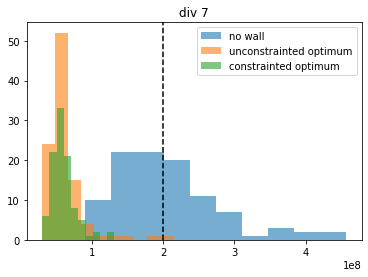

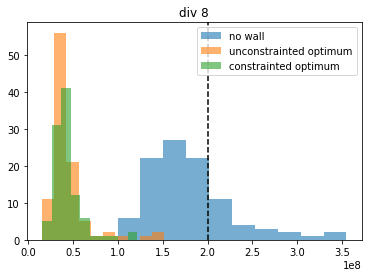

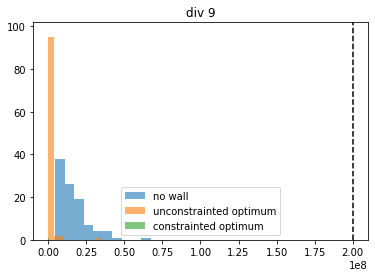

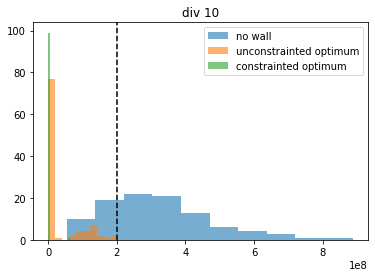

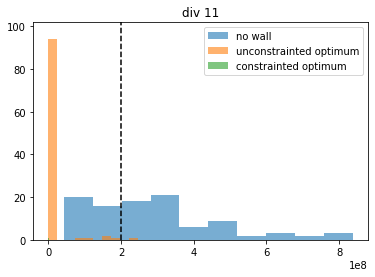

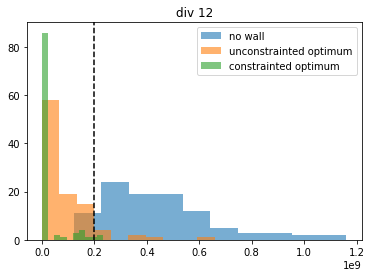

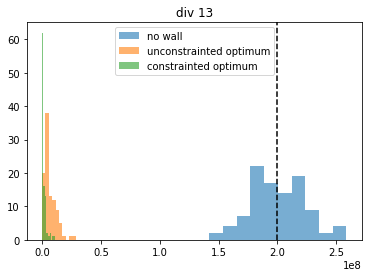

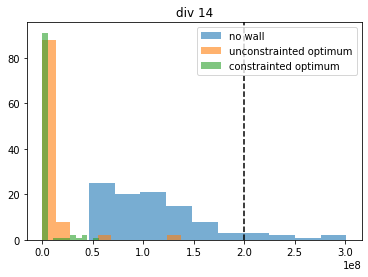

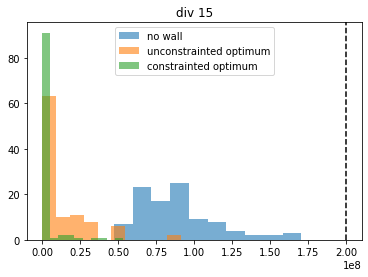

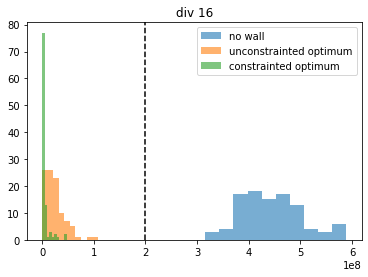

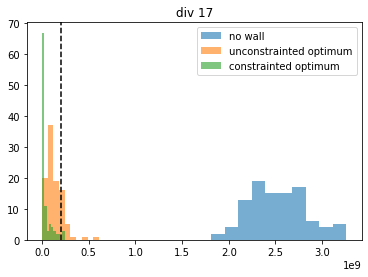

In [77]:
#bins = np.linspace(0,2e9,20)
wallid = 164
print(all_walls_array[wallid])

for i in range(18):
    plt.hist(all_walls_div_array[0,:,i],alpha = 0.6, label = 'no wall')
    plt.hist(all_walls_div_array[wallid,:,i], alpha = 0.6, label = 'unconstrainted optimum')
    plt.hist(all_walls_div_array[166,:,i],alpha = 0.6, label = 'constrainted optimum')
    plt.axvline(threshold, c = 'k', ls = '--')
    plt.title('div ' + str(i))
    plt.legend()
    plt.show()

# Random stuff


In [12]:
all_walls_array = []
for i in range(num_files):
    all_walls_array.append(np.loadtxt('onewall_exhaustive_sections/'+str(i)+'.txt'))
all_walls_array = np.array(all_walls_array)

In [13]:
print(all_walls_array.shape)

(1520, 5)


In [4]:
min_cost = 1e10
min_index = 0
rrange = [20,500,600,1000,1039]
for i in rrange:
    wall = np.loadtxt('onewall_exhaustive_sections/'+str(i)+'.txt')
    div_array = np.load('onewall_exhaustive_sections/'+str(i)+'.npy')
    print(div_array.shape)
    total_cost = wall[3]
    #add condition
    if total_cost < min_cost:
        min_cost = total_cost
        min_index = i
    print(total_cost)

(100, 18, 1)
5895733225.285345
(100, 18, 1)
5904318440.809486
(100, 18, 1)
5820687127.782191
(100, 18, 1)
5861609594.58844
(100, 18, 1)
7062776247.716555


In [15]:
all_div_arrays = []
for i in range(1520):
    all_div_arrays.append(np.load('onewall_exhaustive_sections/'+str(i)+'.npy'))
all_div_arrays = np.array(all_div_arrays)

In [16]:
print(all_div_arrays.shape)

(1520, 100, 18, 1)


In [17]:
all_walls_div_array = all_div_arrays[:,:,:,0]

In [20]:
print(all_walls_div_array.shape)
np.save('all_walls_div_array.npy',all_walls_div_array)
np.save('all_walls_array.npy',all_walls_array)

(1520, 100, 18)


In [25]:
files_list = []
for i in range(20):
    files_list.append(np.random.randint(num_files))
print(files_list)

[1285, 413, 334, 1371, 1078, 1333, 499, 400, 162, 579, 1214, 1141, 793, 565, 356, 666, 1155, 1057, 785, 1360]


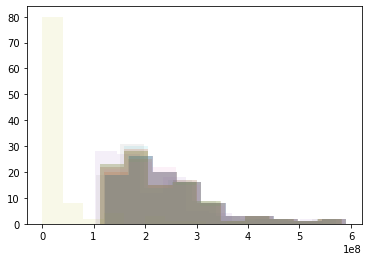

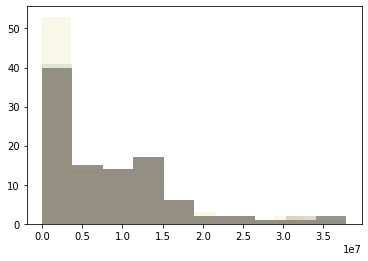

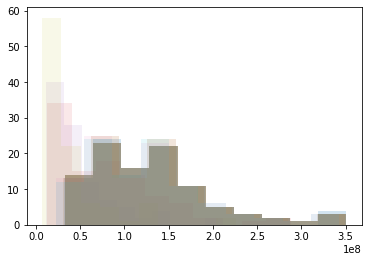

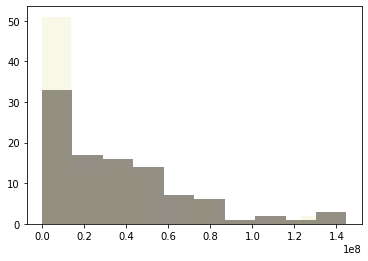

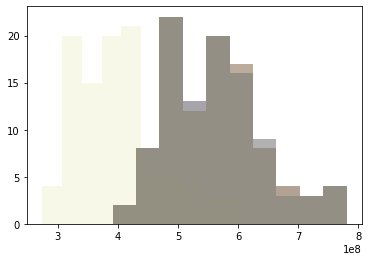

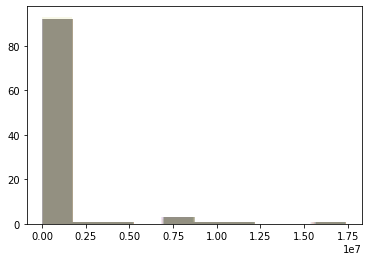

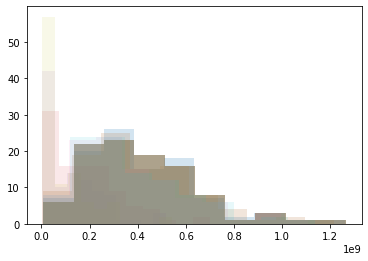

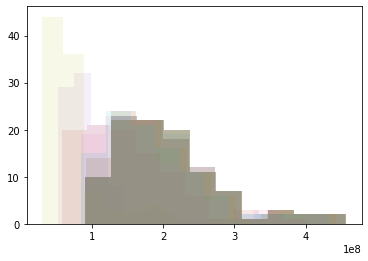

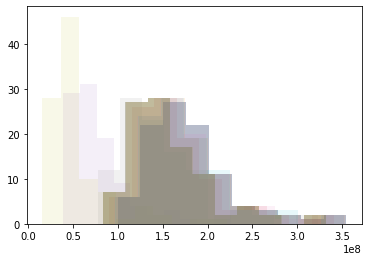

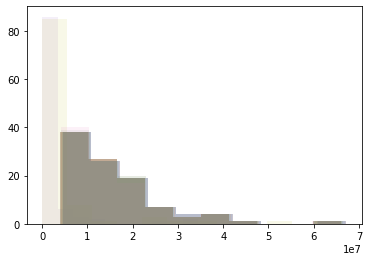

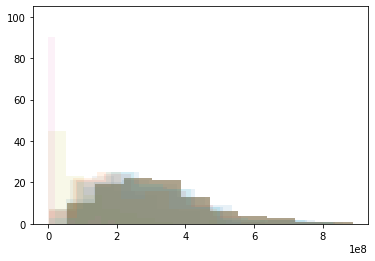

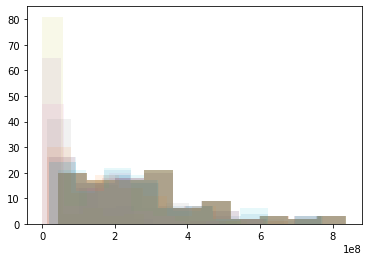

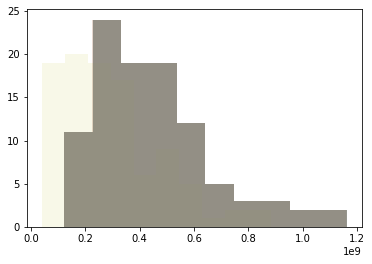

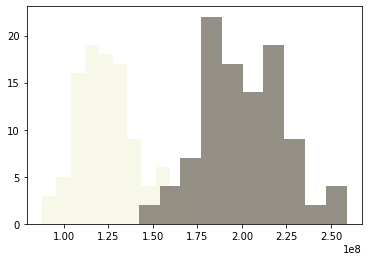

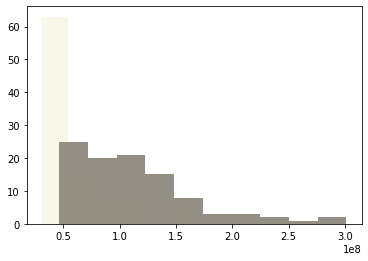

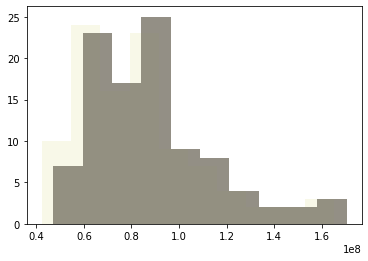

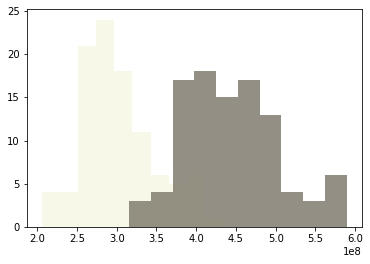

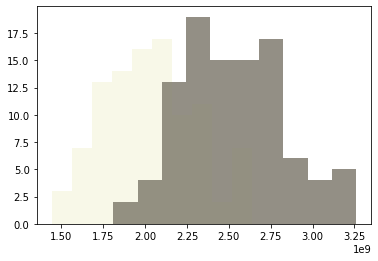

In [26]:
for i in range(18):
    for j in files_list:
        plt.hist(all_div_arrays[j,:,i,0],histtype="stepfilled",alpha = 0.1)
    plt.show()


In [12]:
print(np.random.randint(100))

78


In [7]:
min_cost = 1e10
min_index = 0

satisfy = []
B = 5e8
percent = 95

#rrange = [20,500,600,1000,1039]
for i in range(num_files):
    wall = np.loadtxt('onewall_exhaustive_sections/'+str(i)+'.txt')
    div_array = np.load('onewall_exhaustive_sections/'+str(i)+'.npy')

    if np.sum(np.sum(div_array[:,:,0] < B, axis = 0) > 95) == 18:
        satisfy.append(i)
              
    #print(div_array.shape)
    total_cost = wall[3]

    if total_cost < min_cost:
        min_cost = total_cost
        min_index = i
    print(total_cost)

5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5871561920.183647
5895043120.2982025
5915925075.020348
5940313485.32597
5964981009.153065
5989629175.44636
6014259425.562196
6038879535.745525
6063494038.574051
6088104806.363541
5895733225.285345
5942725045.842661
5985102563.375385
6033493104.348908
6082670888.136177
6131882869.303191
6181094869.303191
6230306869.303191
6279518869.303191
6328730869.303191
5920528464.312779
5991937045.842661
6058920563.375385
6131917104.348908
6205700888.136177
6279518869.303191
6353336869.303191
6427154869.303191
6500972869.303191
6574790869.303191
5945134464.312779
6041128021.933148
6132552149.291473
6230049653.485224
6328428008.675147
6426851969.07481
6525275969.07481
6623699969.07481
6722123969.07481
6820547969.07481
5969740464.312779
6090340021.933148
6206370149.291473
6328473653.485224
6451458008.675147
6574487969.07481

6007345740.244858
6298936193.690672
6622534622.895281
6952636567.820064
7304132504.843887
7649517688.860451
7997890815.413179
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5879108703.496469
5903965873.10724
5928726018.198401
5953429519.705651
5978098765.224669
6002742440.809486
6027348440.809486
6051954440.809486
6076560440.809486
6101166440.809486
5904318440.809486
5953530440.809486
6002742440.809486
6051954440.809486
6101166440.809486
6150378440.809486
6199590440.809486
6248802440.809486
6298014440.809486
6347226440.809486
5931382675.0740185
6007660903.842691
6083564940.440991
6159785638.493602
6236064203.357583
6312342803.357583
6388621403.357583
6464900003.357583
6541178603.357583
6617457203.357583
5955914191.770126
6056798419.629575
6157308412.301662
6258135093.957601
6359019658.719405
6459904258.719405
6560788858.719405
6661673458.719405
6762558058

7308759043.025449
5911940848.840981
6036605255.606142
6195177894.386923
6367606672.376602
6542222209.478251
6716946996.433686
6891654270.930429
7066356870.930429
7241059470.930429
7415762070.930429
5856503448.373289
5946783539.679039
6088514447.591829
6264341169.088886
6458632640.025395
6657281570.903899
6856535131.986998
7055843731.986998
7255152331.986998
7454460931.986998
5743593334.821198
5776695205.307433
5872166644.111609
6041602087.946487
6230542447.538161
6433746030.999093
6640791251.75116
6868347228.507633
7087907488.726241
7311822088.726241
5545329260.176947
5470992409.438365
5512223802.596307
5673063982.305892
5877740494.003366
6104345293.850917
6335886372.127116
6588033818.716212
6832207685.9167595
7080728285.9167595
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5838278338.379399
5862901550.513075
5887566797.6382065
5912217521.2510605
5936850

6215597490.045925
6289415490.045925
6363233490.045925
6437051490.045925
5647556694.639903
5630173810.3805485
5683588251.145877
5768698030.383655
5864118604.429836
5962315927.771076
6060739031.374743
6159163031.374743
6257587031.374743
6356011031.374743
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5853187676.374289
5849710929.311775
5873641480.540409
5898246782.081655
5922852782.081655
5947458782.081655
5972064782.081655
5996670782.081655
6021276782.081655
6045882782.081655
6070488782.081655
5824617596.52685
5867787514.457075
5917235600.968923
5966447600.968923
6015659600.968923
6064871600.968923
6114083600.968923
6163295600.968923
6212507600.968923
6261719600.968923
5688093776.690696
5679238445.944255
5724339377.257878
5793350292.761748
5866665311.563552
5940475636.792703
6014293636.792703
6088111636.792703
6161929636.792703
6235747636.792703
5853187676.374289
5853187676

In [8]:
print(min_cost/(1e9))

2.4472828223283893


In [9]:
print(satisfy)

[164, 165, 166, 167, 168, 169]


In [70]:
scosts = []
for i in satisfy:
    wall = np.loadtxt('onewall_exhaustive_sections/'+str(i)+'.txt')
    scosts.append(wall[3])

In [71]:
print(np.array(scosts)/1e9)

[3.86717235 3.60140574 3.73955587 3.91736454 4.11132239 4.33265087
 4.55080532 3.84318131 3.58841015 3.74776959 3.94871167 4.16657064
 4.41223808 4.65492442 3.86814072 3.57491698 3.74406722 3.9634618
 4.20425046 4.47623075 4.74534134 3.91320655 3.62283796 3.8115773
 4.05280217 4.31667473 4.61284829 4.90645028 3.85197505 3.58499993
 3.7992218  4.06441094 4.35246443 4.67403119 4.99182853 3.68925281
 3.43112998 3.66591769 3.95365489 4.26522503 4.61190938 4.95394704
 3.22215784 2.94057286 3.17319553 3.46695389 3.8057793  4.17313755
 4.53895664 2.71983924 2.44728282 2.69866116 3.01511551 3.37880044
 3.77083628 4.16148231]


In [32]:
i = 1000
div_array = np.load('onewall_exhaustive_sections/'+str(i)+'.npy')

In [58]:
a = div_array[:,:,0] < 3e9
print(a)
np.sum(a, axis = 0) > 90

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# find min subj to constraint and without constraunt
# save data into 2 npy format files